In [127]:
#import necessary packages
from bert_embedding import BertEmbedding  #to get bert word embeddings
from sklearn.manifold import TSNE  #to visualize embeddings by TSNE clusters
import matplotlib.pyplot as plt #simple plot
import re
from sklearn.metrics.pairwise import cosine_similarity

In [73]:
#Movie review collected from https://indianexpress.com/article/entertainment/movie-review/darbar-movie-review-rating-rajinikanth-6207993/
review="""Darbar may be Superstar Rajinikanth’s first film with hit director A R Murugadoss, but it remains a Rajini film which bows at each step to the continuing myth of the one and only Thalaivar.Set in Mumbai, it is about brave police commissioner Aaditya Arunsalam (Rajini) who single-handedly sets out to clean the city of its criminals. The plot is old-hat, the situations are older, but that’s okay. We know what we are in for: a two hour forty minutes Rajini-thon, in which he allows the script to give him set-pieces in which he is the fighter, the romancer, the jokester, the dancer, and everything else that you can think of, all rolled into one.
I have managed to enjoy his films even without subs, because so much of the fun is to watch it with fervent Rajini fans, who hoot and whistle and clap so loudly that most dialogues are drowned in any case. And because they all work to an ultra-familiar pattern, masala moments piled upon masala moments. But this one has subs, so we get a classic interval point in which Rajini does his slo-mo walk towards the camera, drawling, ‘I am a baaaaad cop.’ No one can do it like Rajini can, I tell you.Also, it’s interesting to see many familiar faces from Hindi cinema pop up here: Jatin Sarna as a dispensable hood, Prateik Babbar as a buffed-up drug supplier, Suniel Shetty as the chief crime lord. Nayanthara as the ‘louuu interest’, provides Rajini his awkward, much-older lover moments, and Thomas as his young daughter, allows him to be fun-loving and tender.
Shetty’s floral shirts are eye-catching. Nayanthara delivers some nice thumkas, and a young female cop amongst the male battalion is given a fairly large speaking part. But they know, and we know, that it is all Rajini’s game, in which he will get the best lines.
In a sequence, in which he does something not-so-nice, he goes, with a knowing twinkle: I used to be villain, remember? It is perfect Rajini moment, a hat-tip to his beginnings, and an acknowledgement to his legendary status now, which Darbar never allows us to forget. A song in which Rajini shuffles his feet, while lifting his collar, is nothing but a whole compendium of descriptors, in which Rajini has a ‘lion’s panache’, and is the ‘godfather of machismo’."""

In [120]:
#function to remove special characters and replace with space
def remove_specialchar(text):
    text = re.sub('<[^<]*?/>-', ' ', text)
    
    return text    

In [121]:
text=remove_specialchar(review) # removes special chars

In [124]:
for i in range(len(result)): #BERT model tokenizes sentences 
    print(result[i][0])

['darbar', 'may', 'be', 'superstar', 'rajinikanth', '’', 's', 'first', 'film', 'with', 'hit', 'director', 'a', 'r', 'murugadoss', ',', 'but', 'it', 'remains', 'a', 'rajini', 'film', 'which', 'bows', 'at', 'each', 'step', 'to', 'the', 'continuing', 'myth', 'of', 'the', 'one', 'and', 'only', 'thalaivar', '.', 'set', 'in', 'mumbai', ',', 'it', 'is', 'about', 'brave', 'police', 'commissioner', 'aaditya', 'arunsalam', '(', 'rajini', ')', 'who', 'single', '-', 'handedly', 'sets', 'out', 'to', 'clean', 'the', 'city', 'of', 'its', 'criminals', '.', 'the', 'plot', 'is', 'old', '-', 'hat', ',', 'the', 'situations', 'are', 'older', ',', 'but', 'that', '’']
['i', 'have', 'managed', 'to', 'enjoy', 'his', 'films', 'even', 'without', 'subs', ',', 'because', 'so', 'much', 'of', 'the', 'fun', 'is', 'to', 'watch', 'it', 'with', 'fervent', 'rajini', 'fans', ',', 'who', 'hoot', 'and', 'whistle', 'and', 'clap', 'so', 'loudly', 'that', 'most', 'dialogues', 'are', 'drowned', 'in', 'any', 'case', '.', 'and', 

In [125]:
bert_abstract = text
sentences = bert_abstract.split('\n')    #split paragraph to sentences
bert_embedding = BertEmbedding(max_seq_length=100)   #Intiate the BERT model with a sequence length of 100
result = bert_embedding(sentences)

In [126]:
#result consists of two lists in which first consists of tokens and second list has embeddings.
#below code converts two lists to dictionary
dicta={}
for i in range(len(result)):
    for j in range(len(result[i][0])):
        dicta[result[i][0][j]]=result[i][1][j]

# measure the cosine similarity 

In [137]:
cosine_similarity([dicta['rajini']],[dicta['male']]) 

array([[0.30159777]], dtype=float32)

In [136]:
cosine_similarity([dicta['nayanthara']],[dicta['female']])

array([[0.4583541]], dtype=float32)

In [129]:
cosine_similarity([dicta['rajini']],[dicta['cop']])

array([[0.29746705]], dtype=float32)

# Visualize word embeeddings

In [82]:
def tsne_plot(bert_embedding_dict):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in bert_embedding_dict.keys():
        tokens.append(bert_embedding_dict[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

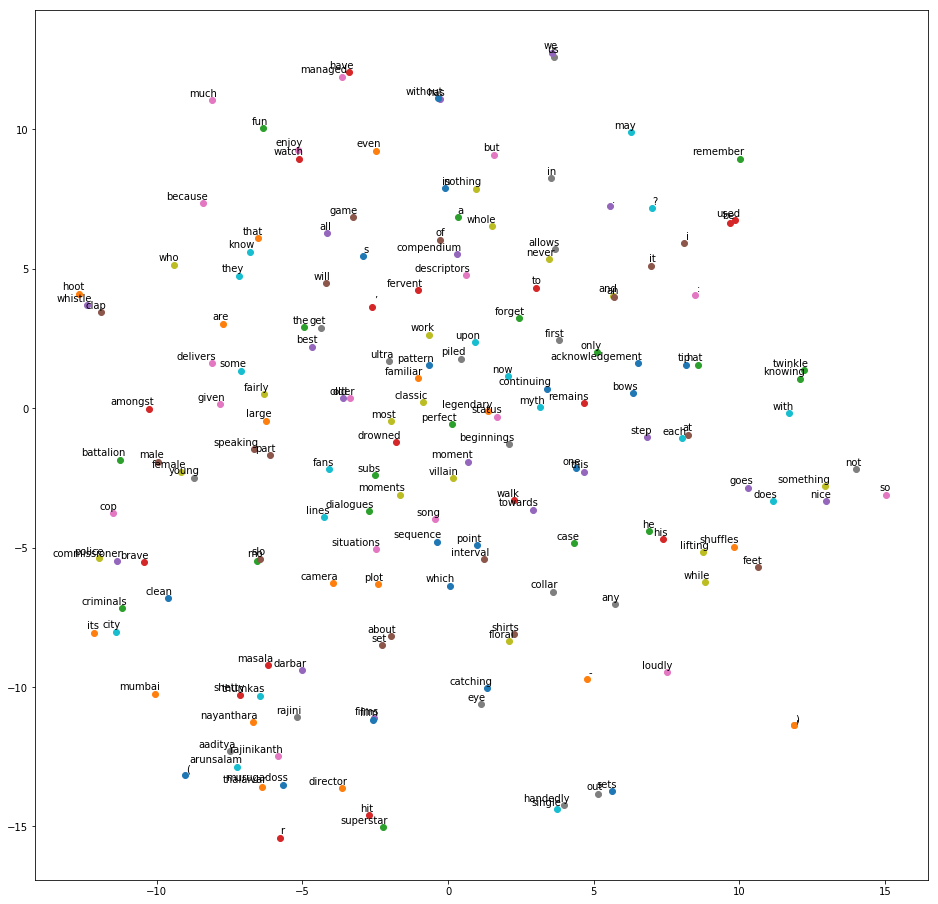

In [83]:
tsne_plot(dicta)